In [1]:
# PCA from scratch (no inbuilt NumPy mean/cov/eig)

# Dataset
X = [
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
]

n = len(X)   # number of samples
d = len(X[0]) # dimensions (2)

# --------------------------
# Step 1: Mean calculation
# --------------------------
mean = [0]*d
for j in range(d):
    for i in range(n):
        mean[j] += X[i][j]
    mean[j] /= n

print("Mean:", mean)

# --------------------------
# Step 2: Center the data
# --------------------------
X_centered = []
for i in range(n):
    row = []
    for j in range(d):
        row.append(X[i][j] - mean[j])
    X_centered.append(row)

# --------------------------
# Step 3: Covariance matrix
# C[i][j] = Σ (x_k[i]-μ[i]) (x_k[j]-μ[j]) / (n-1)
# --------------------------
C = [[0]*d for _ in range(d)]

for i in range(d):
    for j in range(d):
        s = 0
        for k in range(n):
            s += X_centered[k][i] * X_centered[k][j]
        C[i][j] = s / (n-1)

print("\nCovariance Matrix:")
for row in C:
    print(row)

# --------------------------
# Step 4: Eigenvalues manually (2x2 case)
# λ from |C - λI|=0
# --------------------------
a = C[0][0]
b = C[0][1]
c = C[1][0]
d = C[1][1]

# Characteristic polynomial: λ^2 - (a+d)λ + (ad - bc) = 0
trace = a + d
det = a*d - b*c

lambda1 = (trace + ((trace**2 - 4*det)**0.5)) / 2
lambda2 = (trace - ((trace**2 - 4*det)**0.5)) / 2

print("\nEigenvalues:", lambda1, lambda2)

# --------------------------
# Step 5: Eigenvectors
# Solve (C - λI)v = 0
# --------------------------
def eigenvector(lmbda):
    # (a - λ)x + b y = 0  -> choose y=1, solve for x
    if b != 0:
        x = -(a - lmbda)/b
        y = 1
    elif c != 0:
        y = -(d - lmbda)/c
        x = 1
    else:
        x, y = 1, 0
    # normalize
    norm = (x**2 + y**2) ** 0.5
    return [x/norm, y/norm]

v1 = eigenvector(lambda1)
v2 = eigenvector(lambda2)

print("\nEigenvector for λ1:", v1)
print("Eigenvector for λ2:", v2)

# --------------------------
# Step 6: Project data onto PCs
# --------------------------
Y = []
for row in X_centered:
    # dot with v1 and v2
    pc1 = row[0]*v1[0] + row[1]*v1[1]
    pc2 = row[0]*v2[0] + row[1]*v2[1]
    Y.append([pc1, pc2])

print("\nProjected Data (Principal Components):")
for row in Y:
    print(row)


Mean: [1.81, 1.9099999999999997]

Covariance Matrix:
[0.6165555555555556, 0.6154444444444445]
[0.6154444444444445, 0.7165555555555556]

Eigenvalues: 1.2840277121727839 0.04908339893832736

Eigenvector for λ1: [0.735178655544408, 0.6778733985280117]
Eigenvector for λ2: [-0.6778733985280118, 0.7351786555444081]

Projected Data (Principal Components):
[0.8394312376043673, -0.10749510376756799]
[-1.7833108509820685, -0.0015520211370381176]
[0.957814340205051, 0.46345624356303955]
[0.26274936457212034, 0.15219320424035773]
[1.6872624700478192, -0.07311194955773015]
[0.8957575260538893, 0.24863317260135714]
[-0.07045680899024587, -0.3567013289390884]
[-1.1445721637986597, -0.046417258183280685]
[-0.43804613676244986, -0.01776462967508252]
[-1.2066289779498214, -0.26124032914496365]


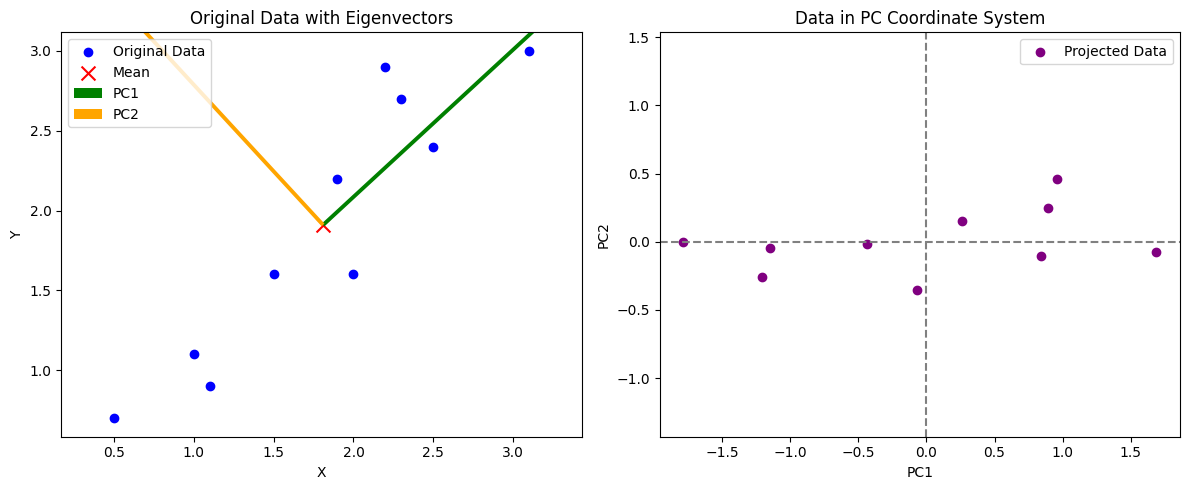

In [2]:
import matplotlib.pyplot as plt

# Dataset
X = [
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
]

n = len(X)
d = len(X[0])

# Step 1: Mean
mean = [0]*d
for j in range(d):
    for i in range(n):
        mean[j] += X[i][j]
    mean[j] /= n

# Step 2: Center data
X_centered = []
for i in range(n):
    row = []
    for j in range(d):
        row.append(X[i][j] - mean[j])
    X_centered.append(row)

# Step 3: Covariance matrix
C = [[0]*d for _ in range(d)]
for i in range(d):
    for j in range(d):
        s = 0
        for k in range(n):
            s += X_centered[k][i] * X_centered[k][j]
        C[i][j] = s / (n-1)

a, b, c, d = C[0][0], C[0][1], C[1][0], C[1][1]
trace = a + d
det = a*d - b*c

# Eigenvalues
lambda1 = (trace + ((trace**2 - 4*det)**0.5)) / 2
lambda2 = (trace - ((trace**2 - 4*det)**0.5)) / 2

# Eigenvectors
def eigenvector(lmbda):
    if b != 0:
        x = -(a - lmbda)/b
        y = 1
    elif c != 0:
        y = -(d - lmbda)/c
        x = 1
    else:
        x, y = 1, 0
    norm = (x**2 + y**2) ** 0.5
    return [x/norm, y/norm]

v1 = eigenvector(lambda1)
v2 = eigenvector(lambda2)

# Step 4: Project data
Y = []
for row in X_centered:
    pc1 = row[0]*v1[0] + row[1]*v1[1]
    pc2 = row[0]*v2[0] + row[1]*v2[1]
    Y.append([pc1, pc2])

# ------------------ PLOTS ------------------

# Original Data + Eigenvectors
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
x_vals = [row[0] for row in X]
y_vals = [row[1] for row in X]
plt.scatter(x_vals, y_vals, color="blue", label="Original Data")

# Draw mean
plt.scatter(mean[0], mean[1], color="red", marker="x", s=100, label="Mean")

# Draw eigenvectors (scaled for visualization)
plt.quiver(mean[0], mean[1], v1[0], v1[1], 
           angles="xy", scale_units="xy", scale=0.5, color="green", label="PC1")
plt.quiver(mean[0], mean[1], v2[0], v2[1], 
           angles="xy", scale_units="xy", scale=0.5, color="orange", label="PC2")

plt.title("Original Data with Eigenvectors")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis("equal")

# Projected Data
plt.subplot(1,2,2)
proj_x = [row[0] for row in Y]
proj_y = [row[1] for row in Y]
plt.scatter(proj_x, proj_y, color="purple", label="Projected Data")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Data in PC Coordinate System")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.axis("equal")

plt.tight_layout()
plt.show()


,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


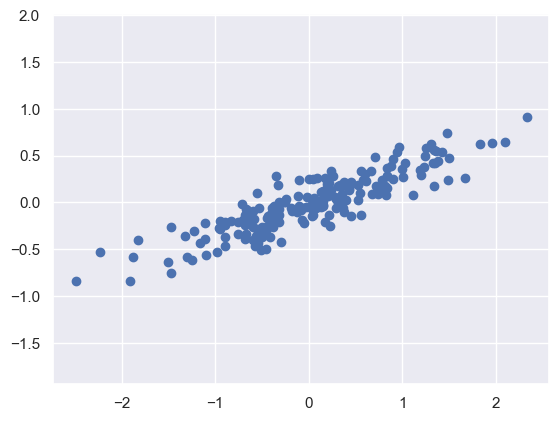

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)